## Parsing Blastn output

In [10]:
from Bio.Blast import NCBIWWW

fh = open('/opt/zeynep/spironucleus/spiro_spiro.blastn')
for blast_record in parse(fh):
    print('query id: {}'.format(blast_record.qid))
    for hit in blast_record.hits:
        for hsp in hit:
            print('****Alignment****')
            print('sequence:', hsp.sid)
            print('length:', hsp.length)
            print('qstart:', hsp.qstart)
            print('qend:', hsp.qend)
fh.close()


query id: chr1
****Alignment****
('sequence:', u'chr1')
('length:', 1924143)
('qstart:', 1)
('qend:', 1924143)
****Alignment****
('sequence:', u'chr1')
('length:', 11631)
('qstart:', 19902)
('qend:', 31520)
****Alignment****
('sequence:', u'chr1')
('length:', 11631)
('qstart:', 8996)
('qend:', 20611)
****Alignment****
('sequence:', u'chr1')
('length:', 10796)
('qstart:', 1081551)
('qend:', 1092346)
****Alignment****
('sequence:', u'chr1')
('length:', 10796)
('qstart:', 1068876)
('qend:', 1079671)
****Alignment****
('sequence:', u'chr1')
('length:', 10923)
('qstart:', 34932)
('qend:', 45838)
****Alignment****
('sequence:', u'chr1')
('length:', 10923)
('qstart:', 20253)
('qend:', 31165)
****Alignment****
('sequence:', u'chr1')
('length:', 10925)
('qstart:', 34932)
('qend:', 45838)
****Alignment****
('sequence:', u'chr1')
('length:', 10925)
('qstart:', 9343)
('qend:', 20256)
****Alignment****
('sequence:', u'chr1')
('length:', 9259)
('qstart:', 1236980)
('qend:', 1246238)
****Alignment***

limit_output extension: Maximum message size of 10000 exceeded with 34849 characters

In [47]:
from Bio.Blast import NCBIXML
from Bio.Blast.Applications import NcbiblastnCommandline

result_handle = open("/opt/zeynep/spironucleus/assembly/spiro.xml")
blast_records = NCBIXML.parse(result_handle)
blast_record = next(blast_records)


E_VALUE_THRESH = 0.04
for alignment in blast_record.alignments:
     for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print("****Alignment****")
            print("sequence:", alignment.title)
            print("align_length:", hsp.align_length)
            print("gaps:", hsp.gaps)
            print("identities:", hsp.identities)
            print("match:", len(hsp.match))
            print(hsp.query[0:75] + "...")
            print(hsp.match[0:75] + "...")
            print(hsp.sbjct[0:75] + "...")
 


****Alignment****
('sequence:', u'gnl|BL_ORD_ID|0 chr1')
('align_length:', 1924143)
('gaps:', 0)
('identities:', 1924143)
('match:', 1924143)
CCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCT...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCT...
****Alignment****
('sequence:', u'gnl|BL_ORD_ID|0 chr1')
('align_length:', 10803)
('gaps:', 1)
('identities:', 10767)
('match:', 10803)
AAACTGCTATATAAATGTATAATAATAAGTAGTACCTATTTTGGGACTGGAGTGAAAATATCTGCTATAATTATA...
|||| | ||||| | || |||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
AAAC-GATATATTATTGCATAATAATAAGTAGTACCTATTTTGGGACTGGAGTGAAAATATCTGCTATAATTATA...
****Alignment****
('sequence:', u'gnl|BL_ORD_ID|0 chr1')
('align_length:', 10803)
('gaps:', 1)
('identities:', 10767)
('match:', 10803)
AAGCCTGAAACAGAAAAACCTCACAAGGTTAAAGATATGTTTTAAAAAATGAAAGATAAAATGCATCATGAGCCC...
|||||||| ||||||||||||||||||||||||

limit_output extension: Maximum message size of 10000 exceeded with 83160 characters

In [85]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]
print(len(df))
df.head()

3773


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
2,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
3,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
4,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551


In [86]:
len(df[df[6] | df[7] == df[8] | df[9]])
df1=df[df[6] | df[7] == df[8] | df[9]]
print(len(df1))
df1

53


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
87,chr1,chr1,97.434,2962,56,12,1037148,1040099,1040099,1037148
8038,chr2,chr2,100.000,1555955,0,0,352365,1908319,352365,1908319
8039,chr2,chr2,100.000,233856,0,0,30569,264424,30569,264424
13987,chr3,chr3,100.000,1815816,0,0,48580,1864395,48580,1864395
26899,chr4,chr4,100.000,1696856,0,0,37099,1733954,37099,1733954
31378,chr5,chr5,100.000,916459,0,0,1,916459,1,916459
31379,chr5,chr5,100.000,780939,0,0,951197,1732135,951197,1732135
45948,chr6,chr6,100.000,1673122,0,0,1,1673122,1,1673122
45974,chr6,chr6,99.330,7017,39,6,868964,875976,875976,868964


limit_output extension: Maximum message size of 10000 exceeded with 13635 characters

In [87]:
len(df[df[6] & df[7] == df[8] & df[9]])
df2=df[df[6] & df[7] == df[8] & df[9]]
print(len(df2))
df2

57


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
87,chr1,chr1,97.434,2962,56,12,1037148,1040099,1040099,1037148
8038,chr2,chr2,100.000,1555955,0,0,352365,1908319,352365,1908319
8039,chr2,chr2,100.000,233856,0,0,30569,264424,30569,264424
13987,chr3,chr3,100.000,1815816,0,0,48580,1864395,48580,1864395
26899,chr4,chr4,100.000,1696856,0,0,37099,1733954,37099,1733954
31378,chr5,chr5,100.000,916459,0,0,1,916459,1,916459
31379,chr5,chr5,100.000,780939,0,0,951197,1732135,951197,1732135
36154,chr5,chr8,95.043,9865,308,100,712,10518,3,9744
45948,chr6,chr6,100.000,1673122,0,0,1,1673122,1,1673122


limit_output extension: Maximum message size of 10000 exceeded with 14613 characters

In [80]:
df3=df[df[6] == df[8]]
print(len(df3))
df3

44


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.0,1924143,0,0,1,1924143,1,1924143
8038,chr2,chr2,100.0,1555955,0,0,352365,1908319,352365,1908319
8039,chr2,chr2,100.0,233856,0,0,30569,264424,30569,264424
13987,chr3,chr3,100.0,1815816,0,0,48580,1864395,48580,1864395
26899,chr4,chr4,100.0,1696856,0,0,37099,1733954,37099,1733954
31378,chr5,chr5,100.0,916459,0,0,1,916459,1,916459
31379,chr5,chr5,100.0,780939,0,0,951197,1732135,951197,1732135
45948,chr6,chr6,100.0,1673122,0,0,1,1673122,1,1673122
55577,chr7,chr7,100.0,1610267,0,0,1,1610267,1,1610267
58299,chr8,chr8,100.0,1071966,0,0,1,1071966,1,1071966


limit_output extension: Maximum message size of 10000 exceeded with 11323 characters

In [83]:
df3=df[df[6] == df[9]]
print(len(df3))
df3

11


,0,1,2,3,4,5,6,7,8,9
87,chr1,chr1,97.434,2962,56,12,1037148,1040099,1040099,1037148
14058,chr3,chr3,99.937,3171,2,0,1525384,1528554,1522214,1525384
14260,chr3,chr3,99.811,1586,3,0,1533775,1535360,1532190,1533775
26920,chr4,chr4,97.976,8103,25,26,871089,879092,863027,871089
45974,chr6,chr6,99.330,7017,39,6,868964,875976,875976,868964
46029,chr6,chr6,98.726,5494,62,4,1005292,1010781,1010781,1005292
46081,chr6,chr6,98.246,4163,51,6,1155022,1159173,1159173,1155022
55590,chr7,chr7,98.852,8190,52,14,544020,552188,552188,544020
55607,chr7,chr7,98.829,4612,38,8,685542,690145,690145,685542
61705,chr9,chr9,96.288,1697,57,5,67789,69481,66095,67789


In [88]:
def anti_join(x, y):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    ans= ans.reset_index()
    return ans
anti_join(df1, df2)

,index,0,1,2,3,4,5,6,7,8,9
0,18,chr9,chr9,99.883,2557,3,0,220973,223529,212269,214825
1,19,chr9,chr9,99.883,2557,3,0,212269,214825,220973,223529


In [69]:
len(  df[(df[6] == df[8])&( df[7] == df[9])])

44

# Within Chromosome

In [89]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[8,9,10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]

df=df[df[0] == df[1]]
print(len(df))
df.head()

2577


,0,1,2,3,4,5,6,7
0,chr1,chr1,100.000,1924143,0,0,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520
2,chr1,chr1,97.042,11631,317,22,8996,20611
3,chr1,chr1,99.685,10796,34,0,1081551,1092346
4,chr1,chr1,99.685,10796,34,0,1068876,1079671


In [90]:
#count number of duplication occurences
cols = range(6)
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
print(len(df1))
df1.head()

2502


,0,1,2,3,4,5,6,7,group,duplicate_count
231,chr1,chr1,95.017,1746,74,11,44109,45847,g1,2
232,chr1,chr1,95.017,1746,74,11,30125,31864,g1,2
273,chr1,chr1,95.182,1515,66,6,46034,47544,g2,2
274,chr1,chr1,95.182,1515,66,6,18400,19911,g2,2
93,chr1,chr1,95.450,2835,85,9,913169,915992,g3,2


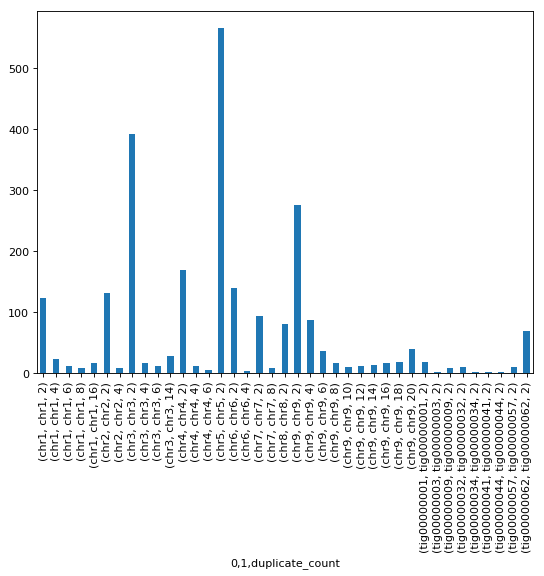

In [175]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

df_gb = df1.groupby([0,1,"duplicate_count"]).size()
df_gb.plot(kind = 'bar')

# Across Chromosome

In [91]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[8,9,10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]

df=df[df[0] != df[1]]
print(len(df))
df.head()

1196


,0,1,2,3,4,5,6,7
1590,chr1,tig00000023,97.843,25778,64,302,1898679,1924143
1591,chr1,tig00000023,97.316,16432,48,249,1893099,1909289
1613,chr1,chr2,96.666,18566,491,50,1873946,1892419
1615,chr1,chr2,97.647,7436,151,5,20774,28207
1616,chr1,chr2,97.526,7436,161,4,35447,42881


In [92]:
#count number of duplication occurences
cols = range(6)
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
print(len(df1))
df1.head()

98


,0,1,2,3,4,5,6,7,group,duplicate_count
1796,chr1,chr7,96.609,1386,40,1,184774,186152,g1,3
1797,chr1,chr7,96.609,1386,40,1,203957,205335,g1,3
1798,chr1,chr7,96.609,1386,40,1,193371,194749,g1,3
18154,chr3,chr5,95.490,1020,41,4,62394,63409,g2,2
18155,chr3,chr5,95.490,1020,41,4,62394,63409,g2,2


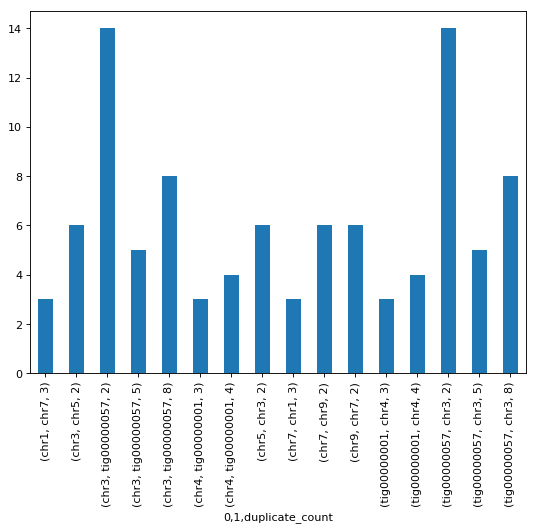

In [178]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

df_gb = df1.groupby([0,1,"duplicate_count"]).size()
df_gb.plot(kind = 'bar')

# Duplicated Regions (DR)

## Blastn spiro-spiro 

threshold >1000 bp %95

In [56]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[8,9,10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]
print(len(df))
df.head()

3773


,0,1,2,3,4,5,6,7
0,chr1,chr1,100.000,1924143,0,0,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520
2,chr1,chr1,97.042,11631,317,22,8996,20611
3,chr1,chr1,99.685,10796,34,0,1081551,1092346
4,chr1,chr1,99.685,10796,34,0,1068876,1079671


In [165]:
df.tail()

,0,1,2,3,4,5,6,7
83462,tig00000108,tig00000106,98.160,4729,62,14,1,4713
83463,tig00000108,tig00000107,97.247,4650,88,12,1,4620
83464,tig00000108,tig00000023,96.132,4680,137,9,1,4642
83465,tig00000108,chr7,96.132,4680,135,11,1,4642
83471,tig00000108,tig00000103,99.537,3672,7,10,1,3669


### count DR duplications

In [58]:
print(len(df.drop_duplicates(subset=[0,1,2,3,4,5],keep=False)))
df.drop_duplicates(subset=[0,1,2,3,4,5],keep=False)
df.head(10)

1173


,0,1,2,3,4,5,6,7
0,chr1,chr1,100.000,1924143,0,0,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520
2,chr1,chr1,97.042,11631,317,22,8996,20611
3,chr1,chr1,99.685,10796,34,0,1081551,1092346
4,chr1,chr1,99.685,10796,34,0,1068876,1079671
5,chr1,chr1,97.647,10923,231,19,34932,45838
6,chr1,chr1,97.647,10923,231,19,20253,31165
7,chr1,chr1,96.934,10925,306,25,34932,45838
8,chr1,chr1,96.934,10925,306,25,9343,20256
9,chr1,chr1,99.784,9259,19,1,1236980,1246238


## count DR location duplications

In [59]:
print(len(df.drop_duplicates(keep=False)))
df.drop_duplicates(keep=False)
df.head(10)

3532


,0,1,2,3,4,5,6,7
0,chr1,chr1,100.000,1924143,0,0,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520
2,chr1,chr1,97.042,11631,317,22,8996,20611
3,chr1,chr1,99.685,10796,34,0,1081551,1092346
4,chr1,chr1,99.685,10796,34,0,1068876,1079671
5,chr1,chr1,97.647,10923,231,19,34932,45838
6,chr1,chr1,97.647,10923,231,19,20253,31165
7,chr1,chr1,96.934,10925,306,25,34932,45838
8,chr1,chr1,96.934,10925,306,25,9343,20256
9,chr1,chr1,99.784,9259,19,1,1236980,1246238


## count DR & non-DR duplications

In [60]:
#find and count duplicated rows
df.duplicated(subset=[0,1,2,3,4,5],keep=False).value_counts()

True     2600
False    1173
dtype: int64

## group DR duplications

In [61]:
#count number of duplication occurences
cols = range(6)
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
print(len(df1))
df1.head()

2600


,0,1,2,3,4,5,6,7,group,duplicate_count
231,chr1,chr1,95.017,1746,74,11,44109,45847,g1,2
232,chr1,chr1,95.017,1746,74,11,30125,31864,g1,2
273,chr1,chr1,95.182,1515,66,6,46034,47544,g2,2
274,chr1,chr1,95.182,1515,66,6,18400,19911,g2,2
93,chr1,chr1,95.450,2835,85,9,913169,915992,g3,2


## count # groups

In [62]:
print(len(df1[df1["duplicate_count"] > 2]))
df1[df1["duplicate_count"] > 2]

450


,0,1,2,3,4,5,6,7,group,duplicate_count
281,chr1,chr1,99.466,1312,7,0,1166704,1168015,g28,16
282,chr1,chr1,99.466,1312,7,0,1170370,1171681,g28,16
283,chr1,chr1,99.466,1312,7,0,1167274,1168585,g28,16
284,chr1,chr1,99.466,1312,7,0,1167844,1169155,g28,16
285,chr1,chr1,99.466,1312,7,0,1170940,1172251,g28,16
286,chr1,chr1,99.466,1312,7,0,1171510,1172821,g28,16
287,chr1,chr1,99.466,1312,7,0,1162546,1163857,g28,16
288,chr1,chr1,99.466,1312,7,0,1172650,1173961,g28,16
289,chr1,chr1,99.466,1312,7,0,1163809,1165120,g28,16
290,chr1,chr1,99.466,1312,7,0,1163809,1165120,g28,16


limit_output extension: Maximum message size of 10000 exceeded with 15171 characters

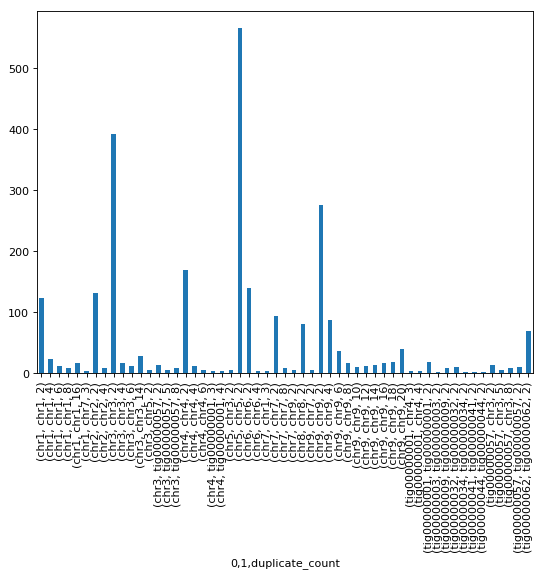

In [153]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

df_gb = df1.groupby([0,1,"duplicate_count"]).size()
df_gb.plot(kind = 'bar')

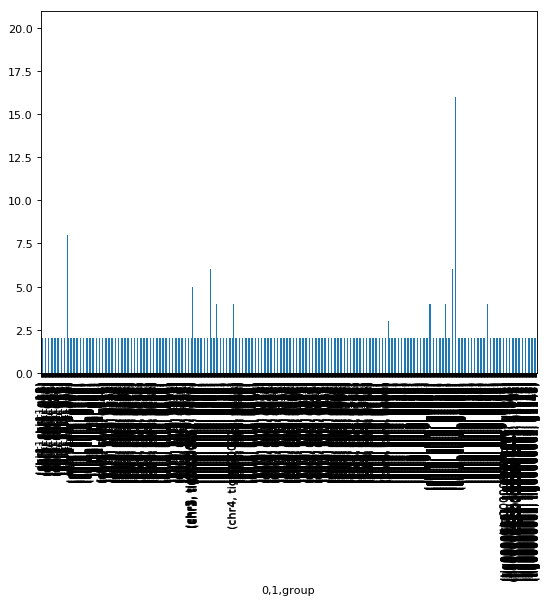

In [154]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


df1.groupby([0,1,"group"]).size().plot(kind = 'bar')

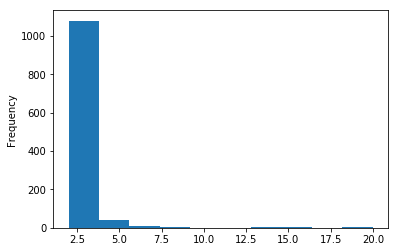

In [155]:
df1.groupby([0,1,"group"]).size().plot(kind = 'hist')

# count DR with locations 

In [54]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[8,9,10,11,12,13,14])

df=df[(df[2]>95 )& (df[3]>1000)]


print(df.duplicated(keep=False).value_counts()) #true=duplicated false=non-duplicated rows
#duplicated rows
df[df.duplicated(keep=False)].head()

False    3532
True      241
dtype: int64


,0,1,2,3,4,5,6,7
100,chr1,chr1,99.755,2452,6,0,1167274,1169725
103,chr1,chr1,99.755,2452,6,0,1167274,1169725
104,chr1,chr1,99.715,2452,7,0,1171510,1173961
105,chr1,chr1,99.715,2452,7,0,1171510,1173961
146,chr1,chr1,99.681,1882,6,0,1167844,1169725


In [50]:
#count number of duplication occurences 

cols = range(8)
df2 = df[df.duplicated(keep=False)].copy()
df2 = df2.sort_values(cols)
df2['group'] = 'g' + (df2.groupby(cols).ngroup() + 1).astype(str)
df2['duplicate_count'] = df2.groupby(cols)[2].transform('size')
print(len(df2))
df2.head(10)

241


,0,1,2,3,4,5,6,7,group,duplicate_count
287,chr1,chr1,99.466,1312,7,0,1162546,1163857,g1,2
291,chr1,chr1,99.466,1312,7,0,1162546,1163857,g1,2
289,chr1,chr1,99.466,1312,7,0,1163809,1165120,g2,4
290,chr1,chr1,99.466,1312,7,0,1163809,1165120,g2,4
293,chr1,chr1,99.466,1312,7,0,1163809,1165120,g2,4
294,chr1,chr1,99.466,1312,7,0,1163809,1165120,g2,4
281,chr1,chr1,99.466,1312,7,0,1166704,1168015,g3,2
295,chr1,chr1,99.466,1312,7,0,1166704,1168015,g3,2
282,chr1,chr1,99.466,1312,7,0,1170370,1171681,g4,2
296,chr1,chr1,99.466,1312,7,0,1170370,1171681,g4,2


In [213]:
df2=df2.drop_duplicates(keep="first")
print(len(df2))
df2

100


,0,1,2,3,4,5,6,7,group,duplicate_count
287,chr1,chr1,99.466,1312,7,0,1162546,1163857,g1,2
289,chr1,chr1,99.466,1312,7,0,1163809,1165120,g2,4
281,chr1,chr1,99.466,1312,7,0,1166704,1168015,g3,2
282,chr1,chr1,99.466,1312,7,0,1170370,1171681,g4,2
288,chr1,chr1,99.466,1312,7,0,1172650,1173961,g5,2
277,chr1,chr1,99.543,1312,6,0,1168414,1169725,g6,2
150,chr1,chr1,99.628,1882,7,0,1172080,1173961,g7,2
146,chr1,chr1,99.681,1882,6,0,1167844,1169725,g8,2
104,chr1,chr1,99.715,2452,7,0,1171510,1173961,g9,2
100,chr1,chr1,99.755,2452,6,0,1167274,1169725,g10,2


limit_output extension: Maximum message size of 10000 exceeded with 15048 characters

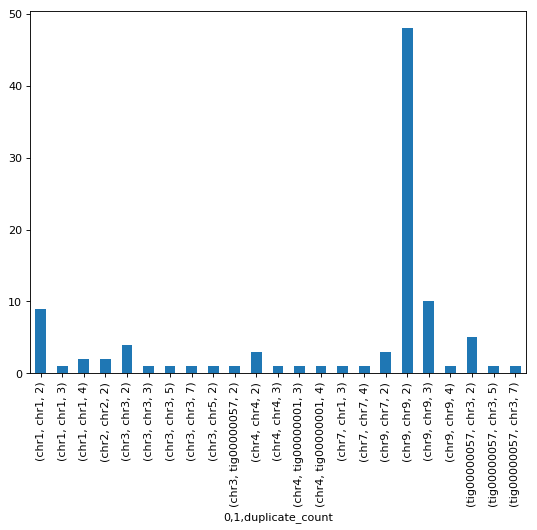

In [206]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

df_gb = df2.groupby([0,1,"duplicate_count"]).size()
df_gb.plot(kind = 'bar')

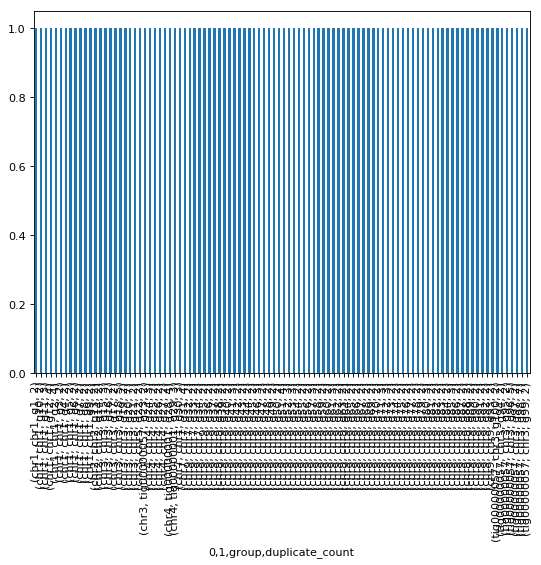

In [211]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


df2.groupby([0,1,"group","duplicate_count"]).size().plot(kind = 'bar')

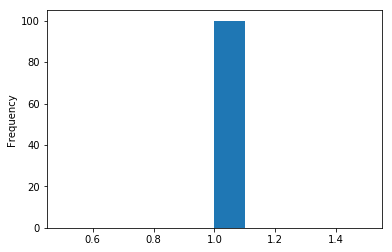

In [212]:
df2.groupby([0,1,"group"]).size().plot(kind = 'hist')